# Statistics

## Guttag chapter 15

In [2]:
%matplotlib inline

#Figure 15.1
import random

def rollDie():
    """Returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)
    
print(rollDie())
rollN(10) # Note output is a string, not an int

5
6521514212


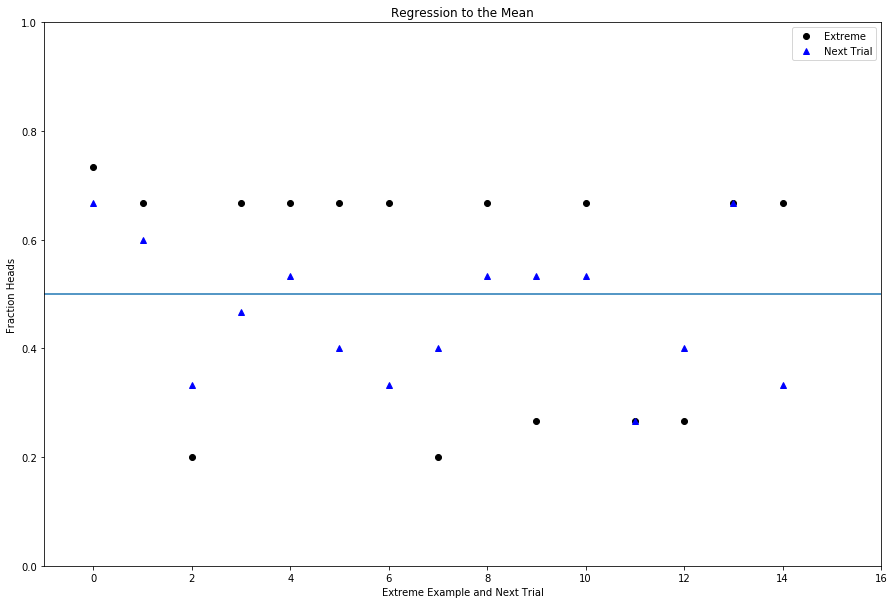

In [4]:
#Figure 15.2
def flip(numFlips):
    """Assumes numFlips a positive int"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    """Assumes numFlipsPerTrial and numTrials positive ints"""
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

#Figure 15.3
import pylab
pylab.rcParams['figure.figsize']=15,10

def regressToMean(numFlips, numTrials):
    #Get fraction of heads for each trial of numFlips
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    #Find trials with extreme results and for each the next trial
    extremes, nextTrials = [], []
    for i in range(len(fracHeads) - 1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    #Plot results
    pylab.plot(range(len(extremes)), extremes, 'ko',
               label = 'Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'b^',
               label = 'Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0, 1)
    pylab.xlim(-1, len(extremes) + 1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')

regressToMean(15, 100)

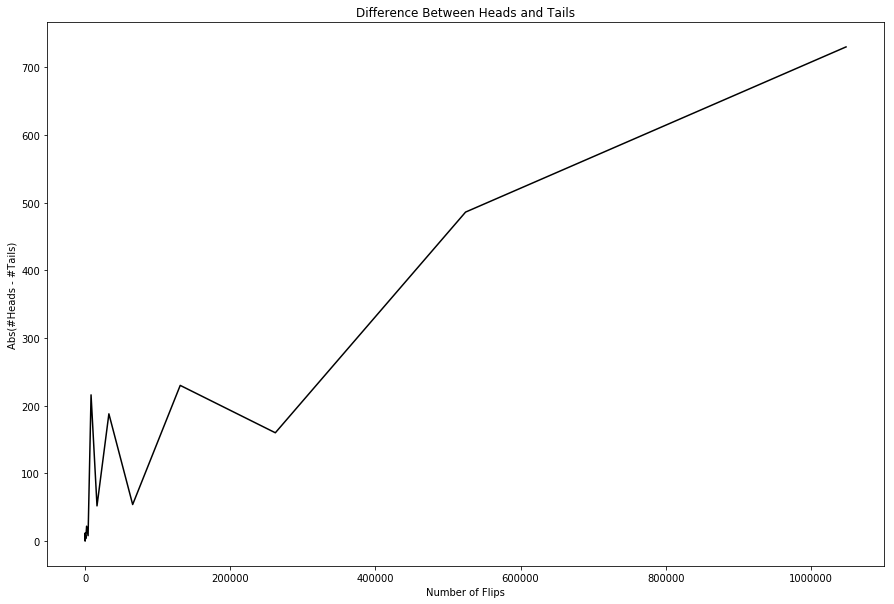

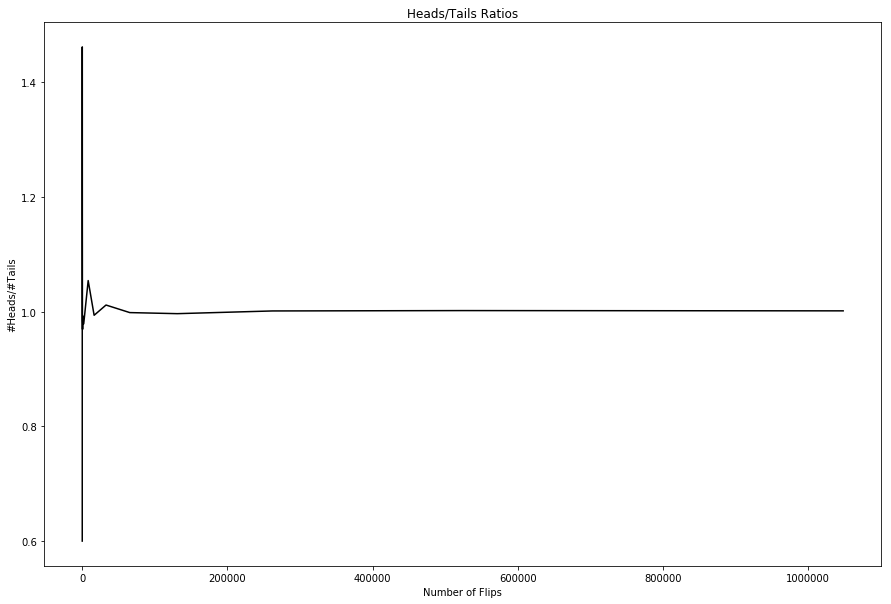

In [22]:
#Figure 15.4 has no code

#Figure 15.5
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios, diffs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'k')

random.seed(0)
flipPlot(4, 20)

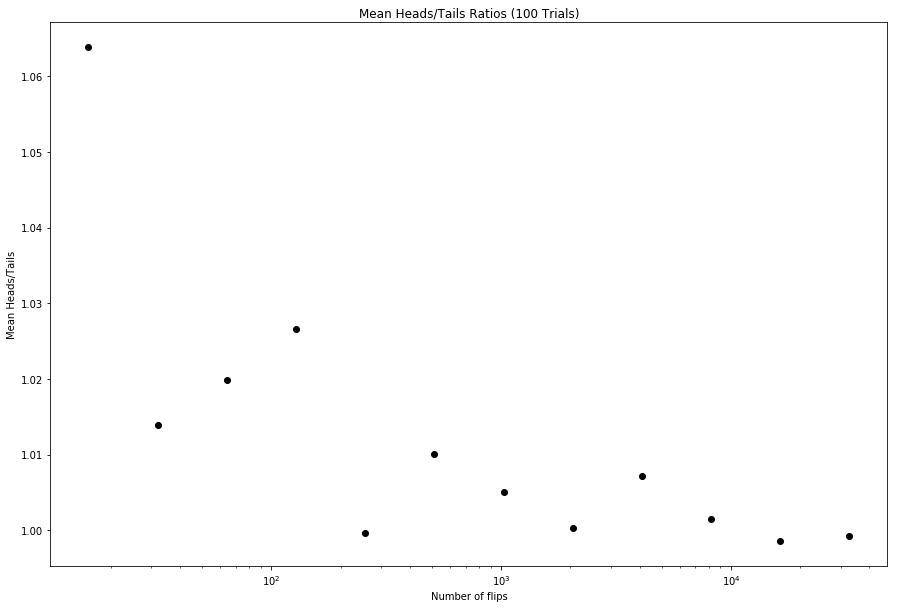

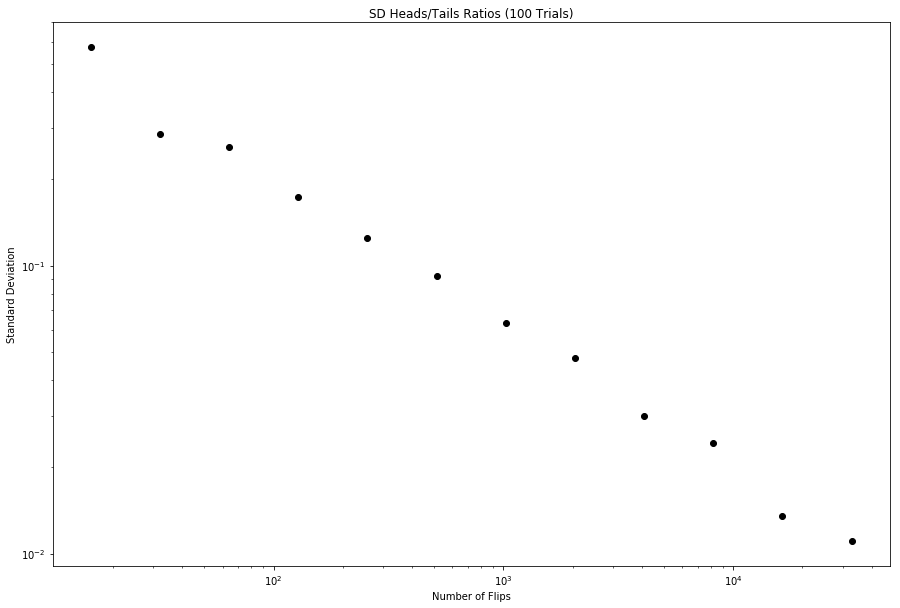

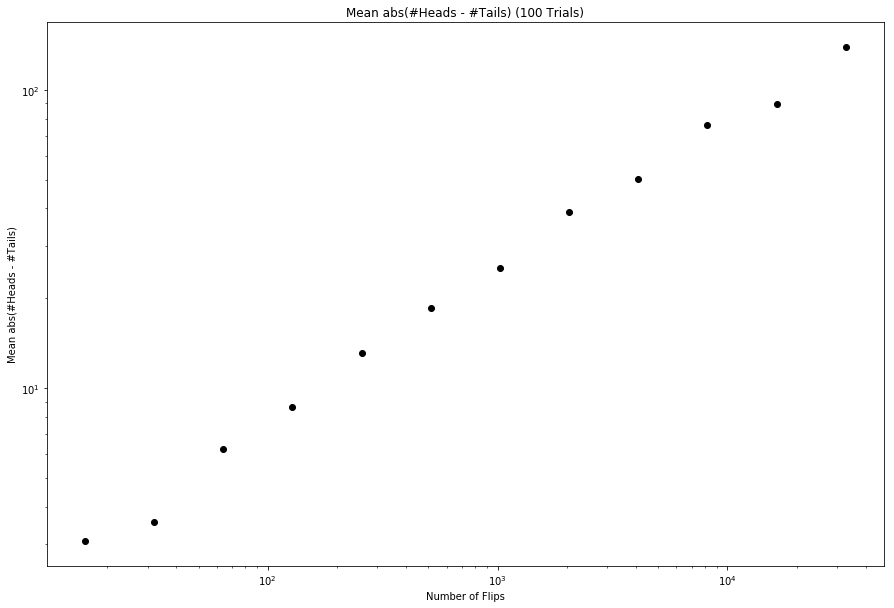

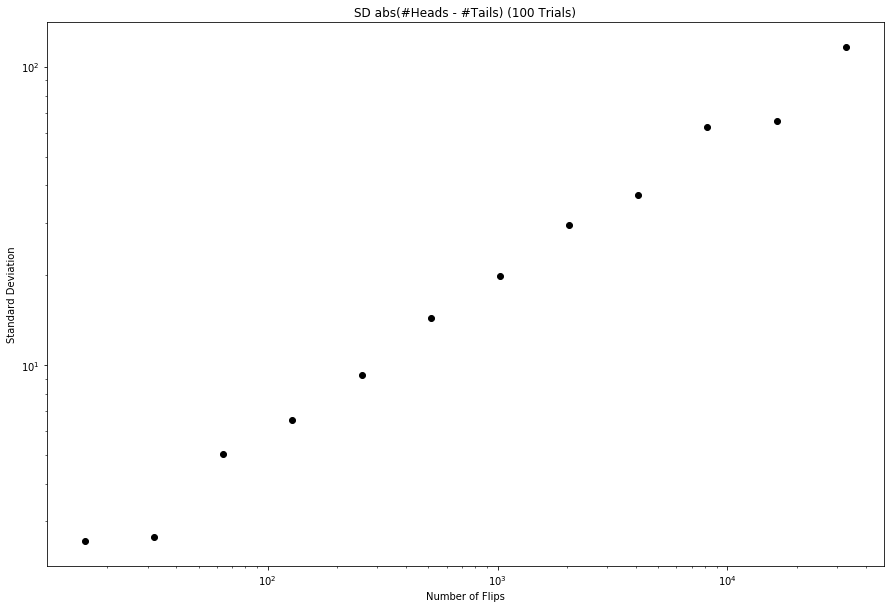

In [36]:
#Figures 15.6-15.7 contain no code

#Figure 15.8
def variance(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)
    
def stdDev(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X"""
    return variance(X)**0.5

#Figure 15.9
def makePlot(xVals, yVals, title, xLabel, yLabel, style,
             logX = False, logY = False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

def flipPlot1(minExp, maxExp, numTrials):
    """Assumes minExp, maxExp, numTrials ints >0; minExp < maxExp
       Plots summaries of results of numTrials trials of
       2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',
             'Mean Heads/Tails', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips',
            'Standard Deviation', 'ko', logX = True, logY = True)

#Figure 15.10 contains no code

#Figure 15.11
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title,
         'Number of Flips', 'Mean abs(#Heads - #Tails)', 'ko',
         logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title,
         'Number of Flips', 'Standard Deviation', 'ko',
         logX = True, logY = True)
    
flipPlot1(4, 15, 100)

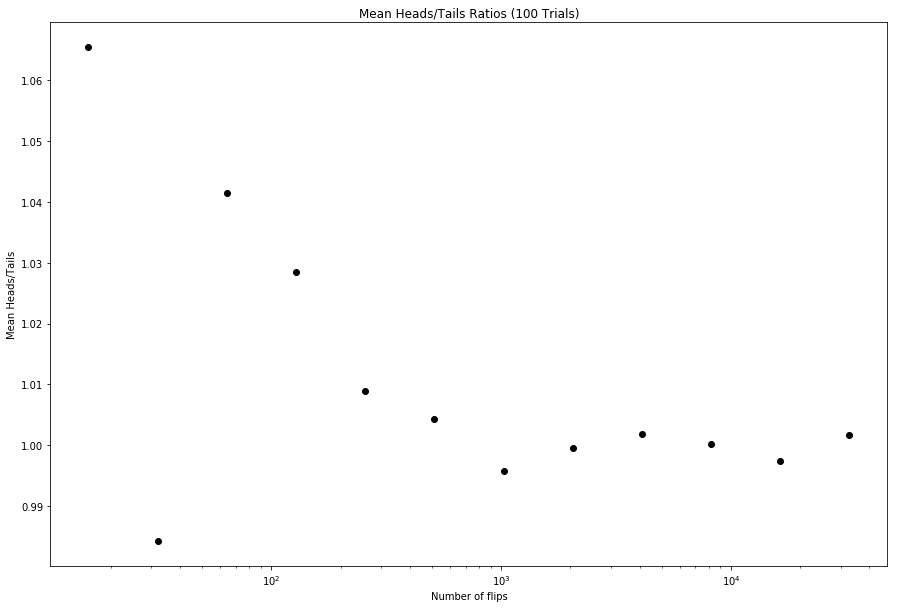

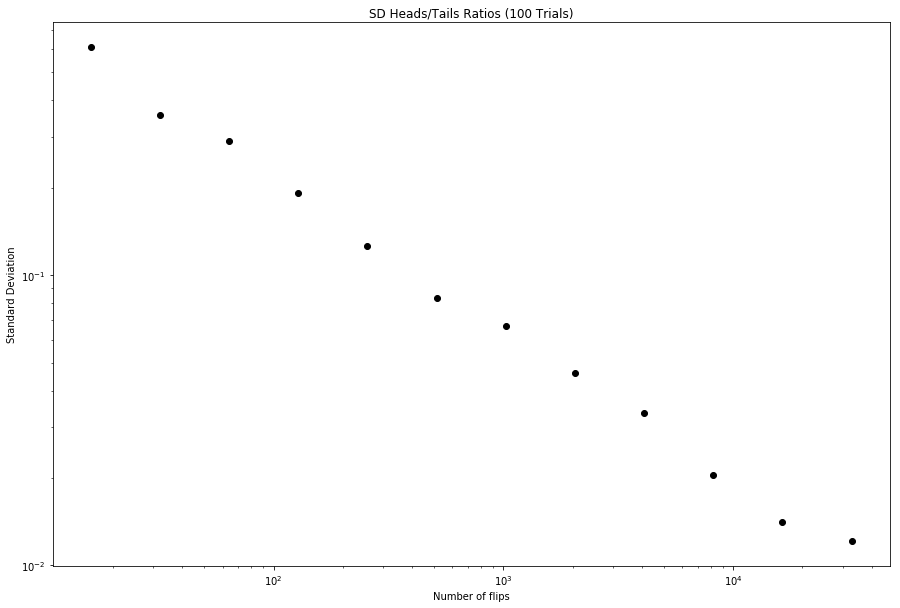

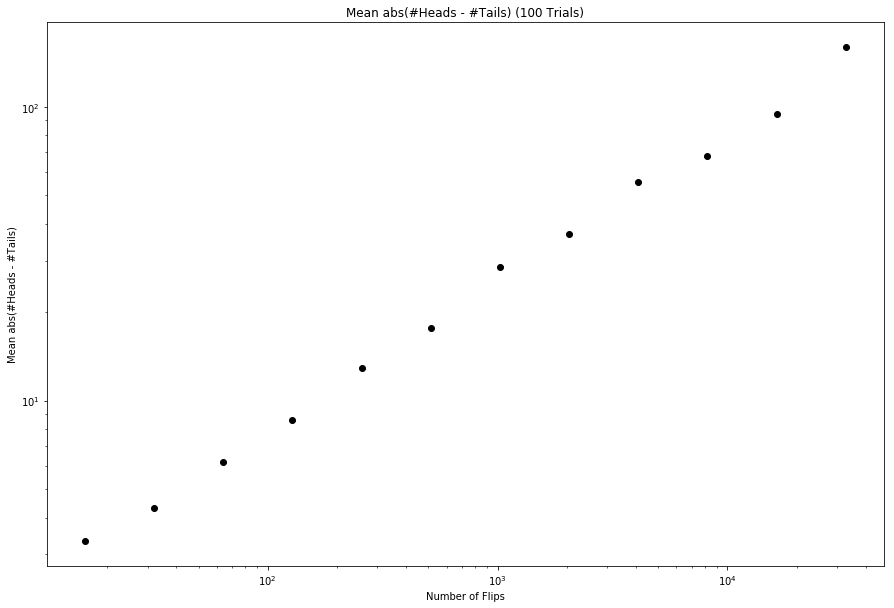

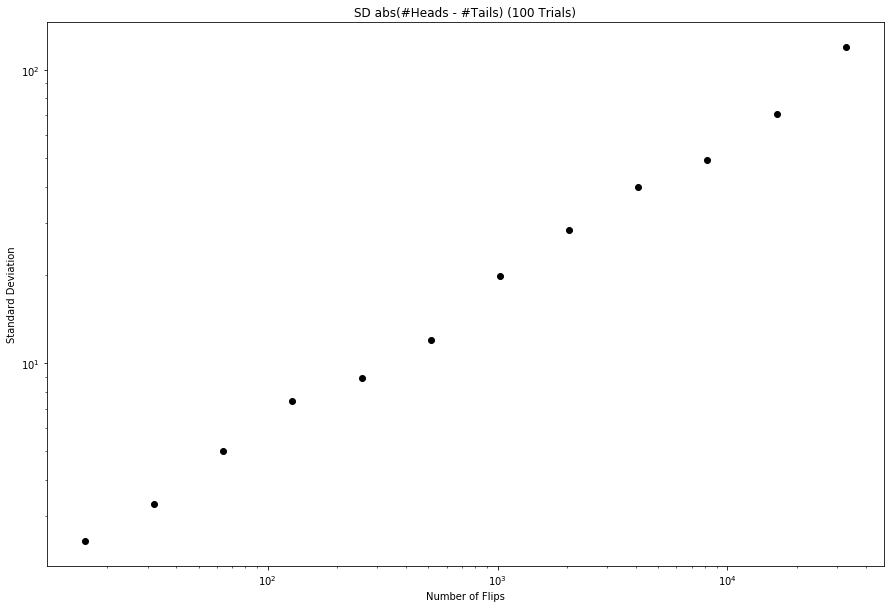

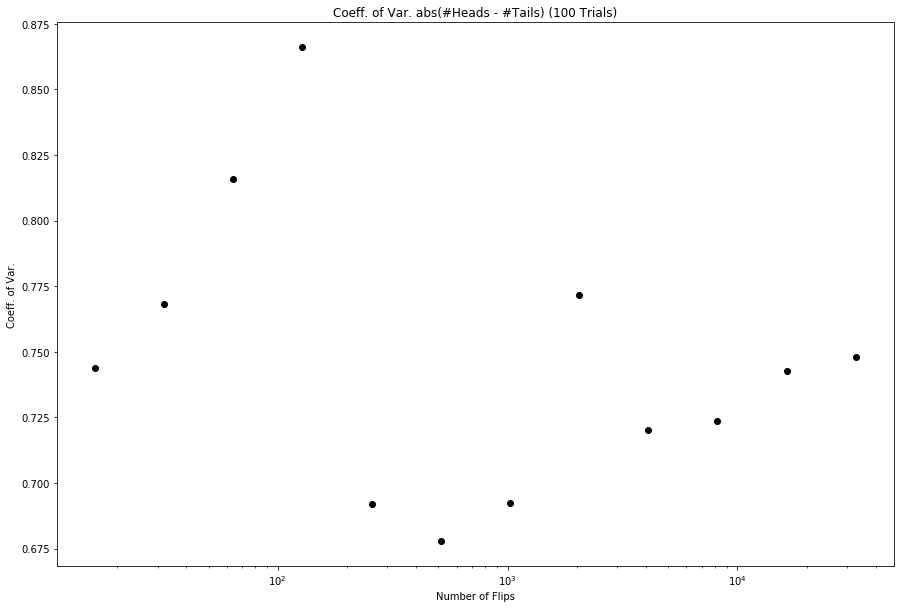

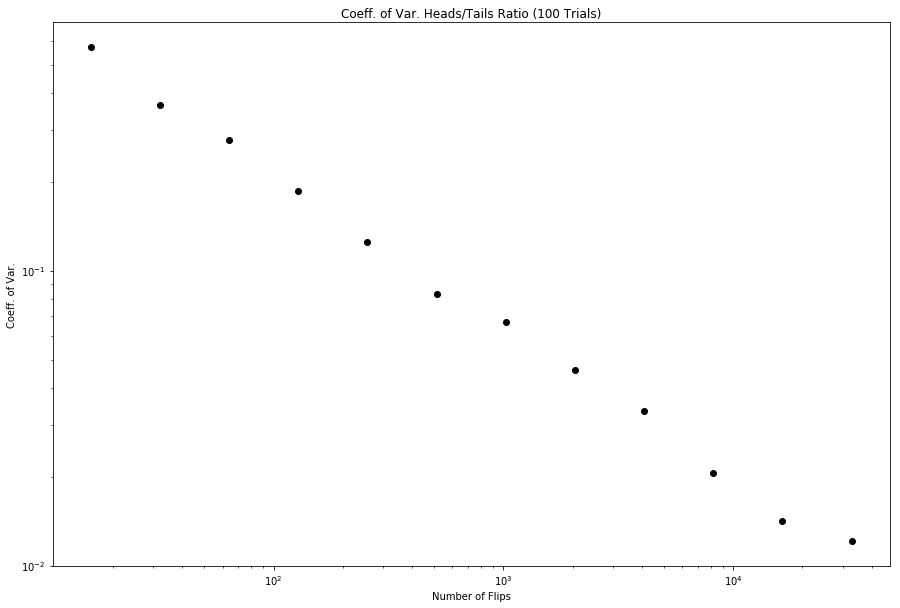

In [37]:
#Figure 15.12 has no code

#Figure 15.13
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

#Figure 15.14
def flipPlot2(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
         numTrials a positive integer
       Plots summaries of results of numTrials trials of
         2**minExp to 2**maxExp coin flips"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    ratiosCVs, diffsCVs, xAxis = [], [], []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips',
             'Mean Heads/Tails', 'ko', logX = True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of flips',
             'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsMeans, title,'Number of Flips',
             'Mean abs(#Heads - #Tails)', 'ko',
             logX = True, logY = True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsSDs, title, 'Number of Flips',
             'Standard Deviation', 'ko', logX = True, logY = True)
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis, diffsCVs, title, 'Number of Flips',
             'Coeff. of Var.', 'ko', logX = True)
    title = 'Coeff. of Var. Heads/Tails Ratio' + numTrialsString
    makePlot(xAxis, ratiosCVs, title, 'Number of Flips',
             'Coeff. of Var.', 'ko', logX = True, logY = True)
    
flipPlot2(4,15,100)

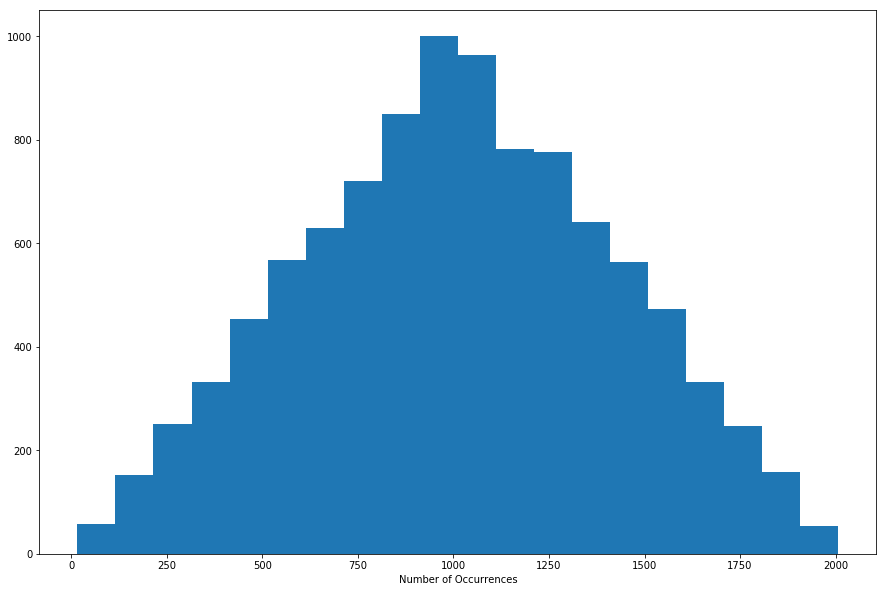

In [9]:
#Figures 15.15-15.17 have no code

#Figure 15.18
vals = []
for i in range(10000):
    num1 = random.choice(range(0, 1010))
    num2 = random.choice(range(0, 1010))
    vals.append(num1 + num2)
pylab.hist(vals, bins = 20)
pylab.xlabel('Number of Occurrences')
pylab.show()

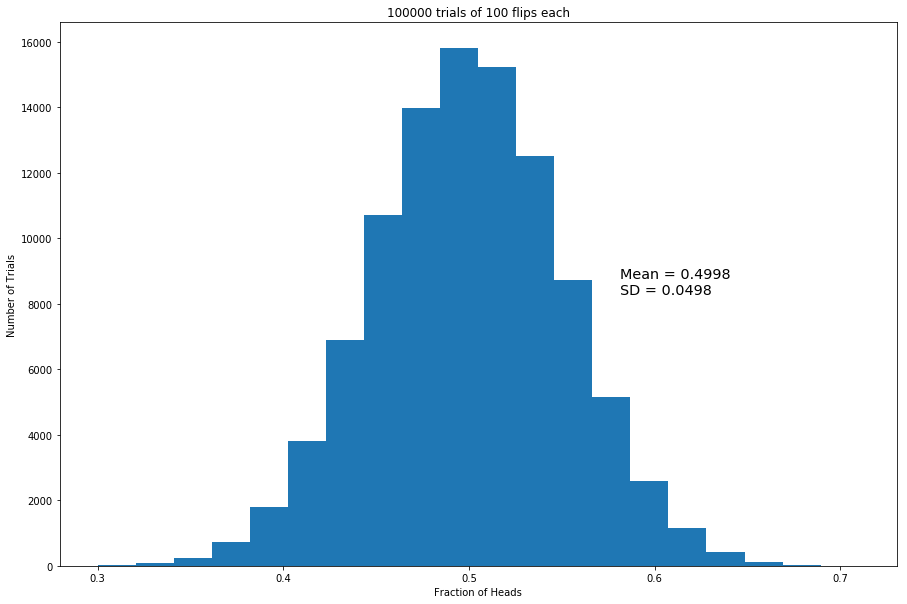

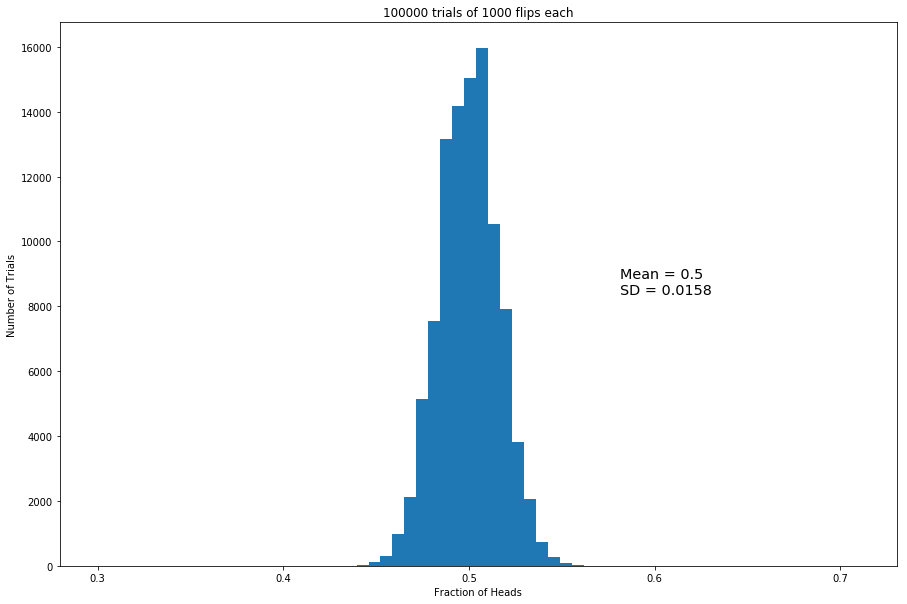

In [24]:
#Figure 15.19
def flip(numFlips):
    """Assumes numFlips a positive int"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':
            heads += 1
    return heads/float(numFlips)

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean = ' + str(round(mean, 4))\
                   + '\nSD = ' + str(round(sd, 4)), size='x-large',
                   xycoords = 'axes fraction', xy = (0.67, 0.5))

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 20)
    xmin,xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

makePlots(100, 1000, 100000)

In [25]:
#Figures 15.20-15.22 contain no code

#Figure 15.23
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10, 10)
        sigma = random.randint(1, 10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1, 2, 3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma,
                                        mu+numStd*sigma,
                                        (mu, sigma))[0]
            print('  Fraction within', numStd, 'std =',
                  round(area, 4))

checkEmpirical(3)

For mu = 8 and sigma = 4
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973
For mu = -9 and sigma = 7
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973
For mu = 0 and sigma = 1
  Fraction within 1 std = 0.6827
  Fraction within 2 std = 0.9545
  Fraction within 3 std = 0.9973


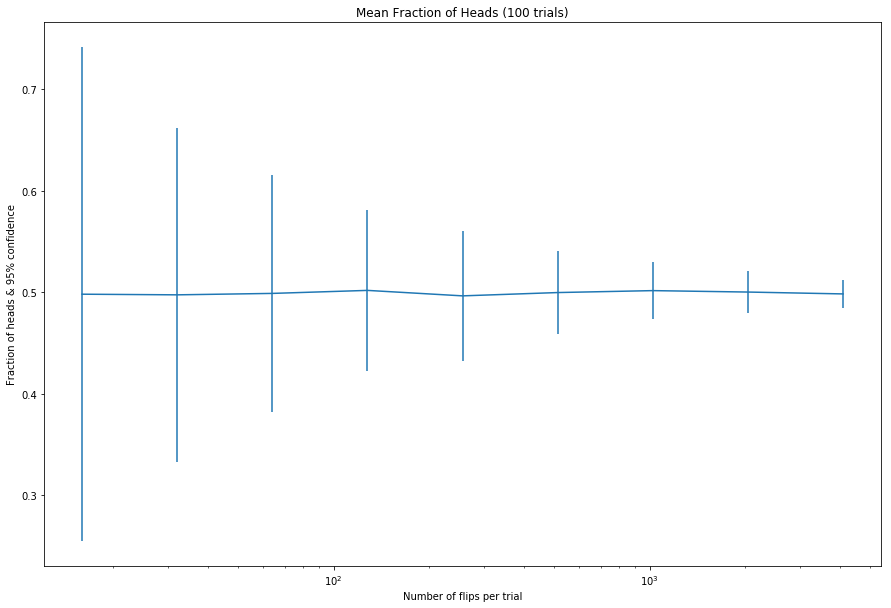

In [38]:
#Figure 15.24
def showErrorBars(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
         numTrials a positive integer
       Plots mean fraction of heads with error bars"""
    means, sds, xVals = [], [], []
    for exp in range(minExp, maxExp + 1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals, means, yerr=1.96*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads ('
                + str(numTrials) + ' trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads & 95% confidence')
    
showErrorBars(4, 12, 100)

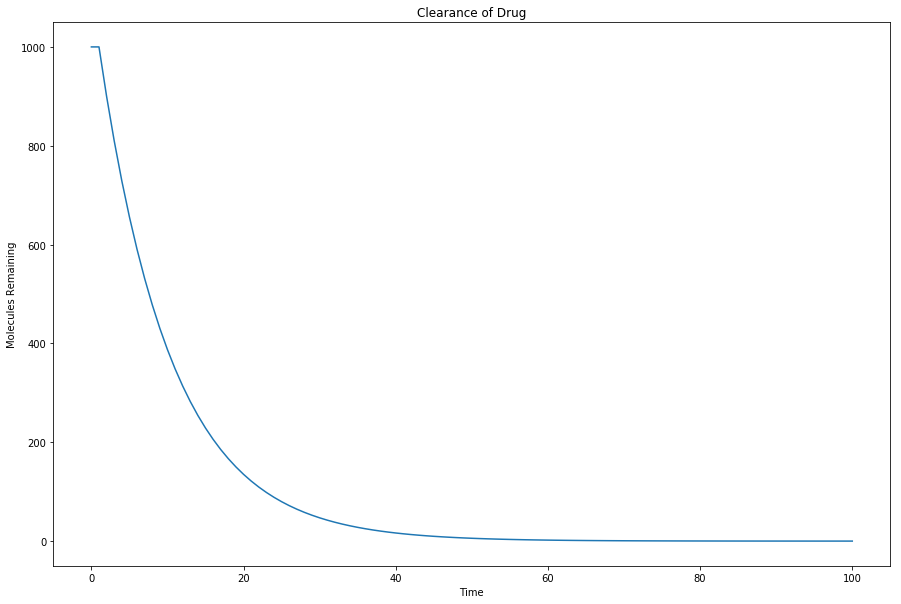

In [40]:
#Figure 15.25 contains no code

#Figure 15.26
def clear(n, p, steps):
    """Assumes n & steps positive ints, p a float
         n: the initial number of molecules
         p: the probability of a molecule being cleared
         steps: the length of the simulation"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of Drug')
    
clear(1000, 0.1, 100)

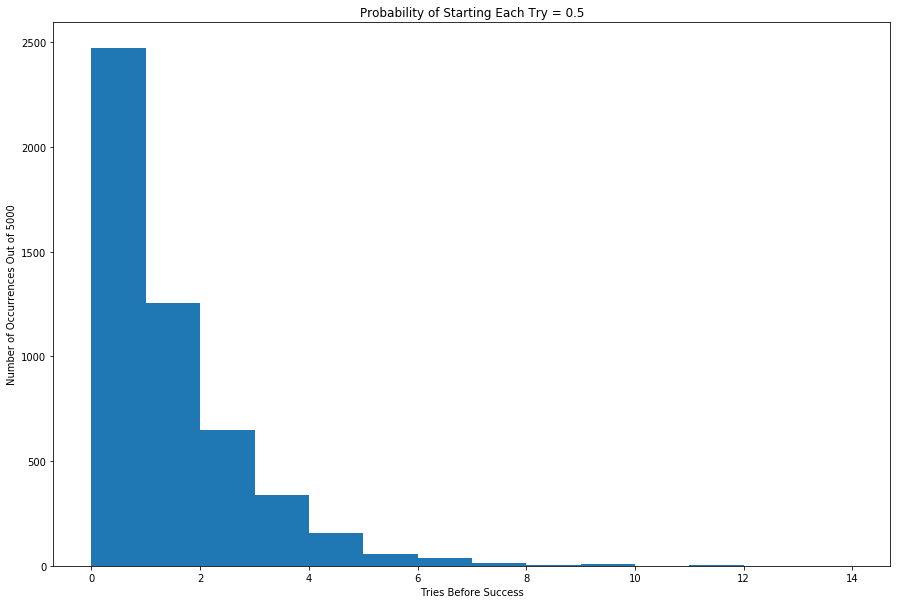

In [42]:
#Figures 15.27-15.28 contain no code

#Figure 15.29
def successfulStarts(successProb, numTrials):
    """Assumes successProb is a float representing probability of a
         single attempt being successful. numTrials a positive int
       Returns a list of the number of attempts needed before a
         success for each trial."""
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials)
pylab.hist(distribution, bins = 14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurrences Out of ' + str(numTrials))
pylab.title('Probability of Starting Each Try = '\
            + str(probOfSuccess))
pylab.show()

Probability of a collision for 20 insertions in 1,000 slots:  0.169


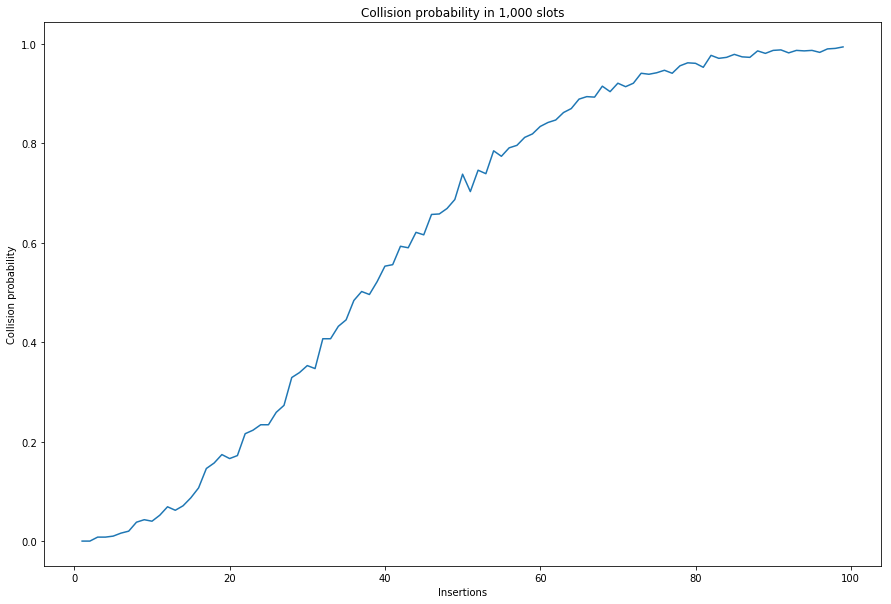

In [48]:
#Figure 15.30 contains no code

#Figure 15.31
def simInsertions(numIndices, numInsertions):
    """Assumes numIndices and numInsertions are positive ints.
       Returns 1 if there is a collision; 0 otherwise"""
    choices = range(numIndices) #list of possible indices
    used = []
    for i in range(numInsertions):
        hashVal = random.choice(choices)
        if hashVal in used: #there is a collision
            return 1
        else:
            used.append(hashVal)
    return 0

def findProb(numIndices, numInsertions, numTrials):
    collisions = 0
    for t in range(numTrials):
        collisions += simInsertions(numIndices, numInsertions)
    return collisions/numTrials

print("Probability of a collision for 20 insertions in 1,000 slots: ", findProb(1000,20,1000))

insertions = []
collision_prob = []
for i in range(1,100):
    insertions.append(i)
    collision_prob.append(findProb(1000,i,1000))
pylab.plot(insertions, collision_prob)
pylab.xlabel('Insertions')
pylab.ylabel('Collision probability') 
pylab.title("Collision probability in 1,000 slots")
pylab.show()

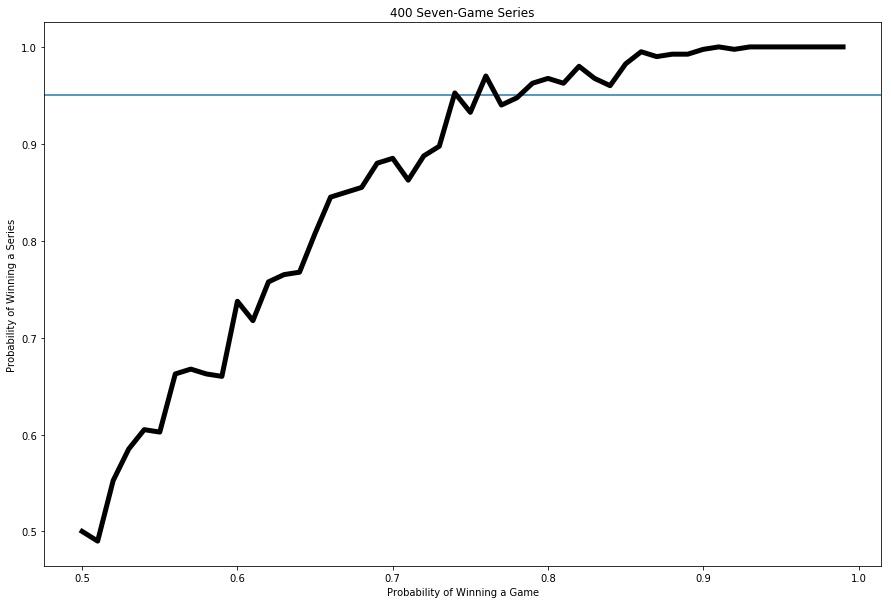

In [27]:
#Figure 15.32
def playSeries(numGames, teamProb):
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)
    
def fractionWon(teamProb, numSeries, seriesLen):
    won = 0
    for series in range(numSeries):
        if playSeries(seriesLen, teamProb):
            won += 1
    return won/float(numSeries)

def simSeries(numSeries):
    prob = 0.5
    fracsWon, probs = [], []
    while prob <= 1.0:
        fracsWon.append(fractionWon(prob, numSeries, 7))
        probs.append(prob)
        prob += 0.01
    pylab.axhline(0.95) #Draw line at 95%
    pylab.plot(probs, fracsWon, 'k', linewidth = 5)
    pylab.xlabel('Probability of Winning a Game')
    pylab.ylabel('Probability of Winning a Series') 
    pylab.title(str(numSeries) + ' Seven-Game Series')

simSeries(400)

## Guttag chapter 17

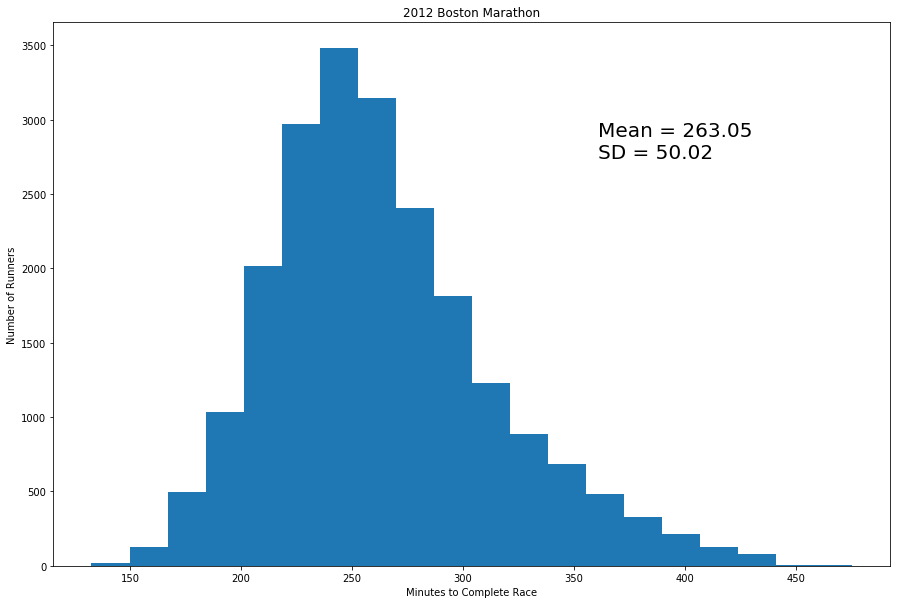

In [11]:
#Figure 17.1 has no code

import pylab

#Figure 15.8 (repeated)
def variance(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)
    
def stdDev(X):
    """Assumes that X is a list of numbers.
       Returns the standard deviation of X"""
    return variance(X)**0.5

#Figure 17.2
def getBMData(filename):
    """Read the contents of the given file. Assumes the file 
    in a comma-separated format, with 6 elements in each entry:
    0. Name (string), 1. Gender (string), 2. Age (int)
    3. Division (int), 4. Country (string), 5. Overall time (float)   
    Returns: dict containing a list for each of the 6 variables."""

    data = {}
    f = open(filename)
    line = f.readline() 
    data['name'], data['gender'], data['age'] = [], [], []
    data['division'], data['country'], data['time'] = [], [], []
    while line != '':
        split = line.split(',')
        data['name'].append(split[0])
        data['gender'].append(split[1])
        data['age'].append(int(split[2]))
        data['division'].append(int(split[3]))
        data['country'].append(split[4]) 
        data['time'].append(float(split[5][:-1])) #remove \n
        line = f.readline()
    f.close()
    return data
    
def makeHist(data, bins, title, xLabel, yLabel):
    pylab.hist(data, bins)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    mean = sum(data)/len(data)
    std = stdDev(data)
    pylab.annotate('Mean = ' + str(round(mean, 2)) +\
              '\nSD = ' + str(round(std, 2)), fontsize = 20,
              xy = (0.65, 0.75), xycoords = 'axes fraction')             
             
times = getBMData('bm_results2012.txt')['time']
makeHist(times, 20, '2012 Boston Marathon',
            'Minutes to Complete Race', 'Number of Runners')

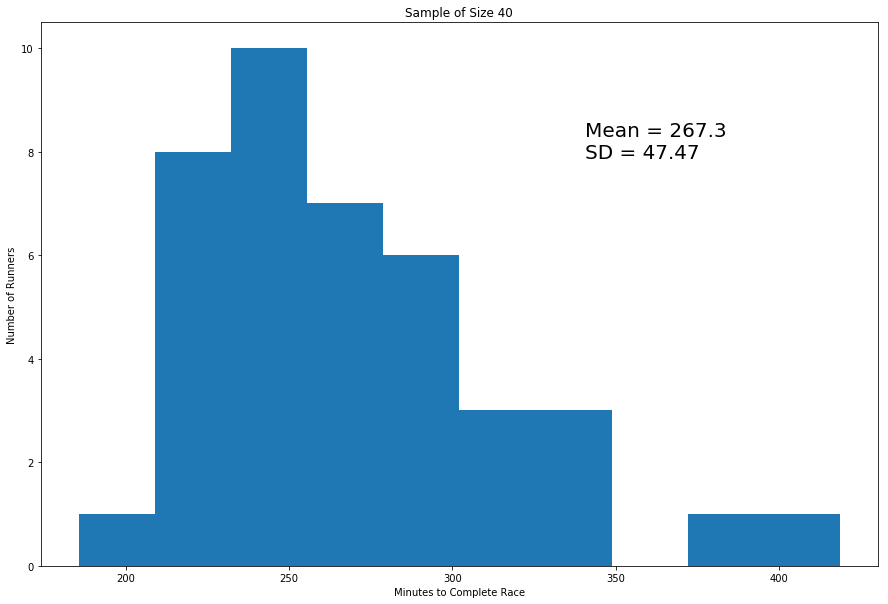

In [15]:
#Figure 17.3 has no code

import random

#Figure 17.4
def sampleTimes(times, numExamples):
    """Assumes times a list of floats representing finishing
       times of all runners. numExamples an int
       Generates a random sample of size numExamples, and produces
       a histogram showing the distribution along with its mean and
       standard deviation"""
    sample = random.sample(times, numExamples)
    makeHist(sample, 10, 'Sample of Size ' + str(numExamples),
            'Minutes to Complete Race', 'Number of Runners')

sampleSize = 40       
sampleTimes(times, sampleSize)

In [30]:
#Figure 17.5 has no code

#Figure 17.6
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 1))[0], 4)
print('Probability of being within 3',
      'of true mean of tight dist. =', area)
area = round(scipy.integrate.quad(gaussian, -3, 3, (0, 100))[0], 4)
print('Probability of being within 3',
      'of true mean of wide dist. =', area)

Probability of being within 3 of true mean of tight dist. = 0.9973
Probability of being within 3 of true mean of wide dist. = 0.0239


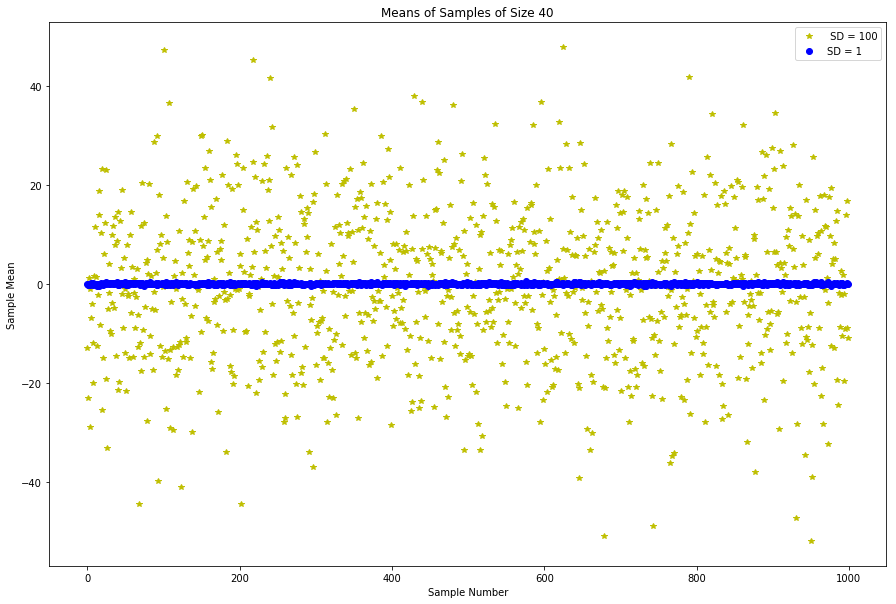

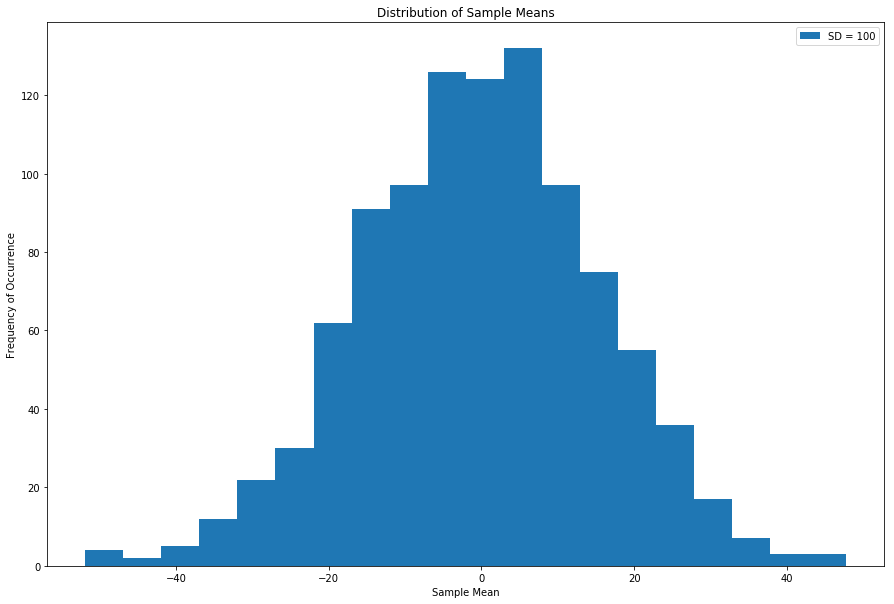

In [31]:
#Figure 17.7
def testSamples(numTrials, sampleSize):
    tightMeans, wideMeans = [], []
    for t in range(numTrials):
        sampleTight, sampleWide = [], []
        for i in range(sampleSize):
            sampleTight.append(random.gauss(0, 1))
            sampleWide.append(random.gauss(0, 100))
        tightMeans.append(sum(sampleTight)/len(sampleTight))
        wideMeans.append(sum(sampleWide)/len(sampleWide))
    return tightMeans, wideMeans

tightMeans, wideMeans = testSamples(1000, 40)
pylab.plot(wideMeans, 'y*', label = ' SD = 100')
pylab.plot(tightMeans, 'bo', label = 'SD = 1')
pylab.xlabel('Sample Number')
pylab.ylabel('Sample Mean')
pylab.title('Means of Samples of Size ' + str(40))
pylab.legend()

pylab.figure()
pylab.hist(wideMeans, bins = 20, label = 'SD = 100')
pylab.title('Distribution of Sample Means')
pylab.xlabel('Sample Mean')
pylab.ylabel('Frequency of Occurrence')
pylab.legend()

Mean of rolling 1 die = 2.5051 Variance = 2.0919
Mean of rolling 100 dice = 2.4953 Variance = 0.0208


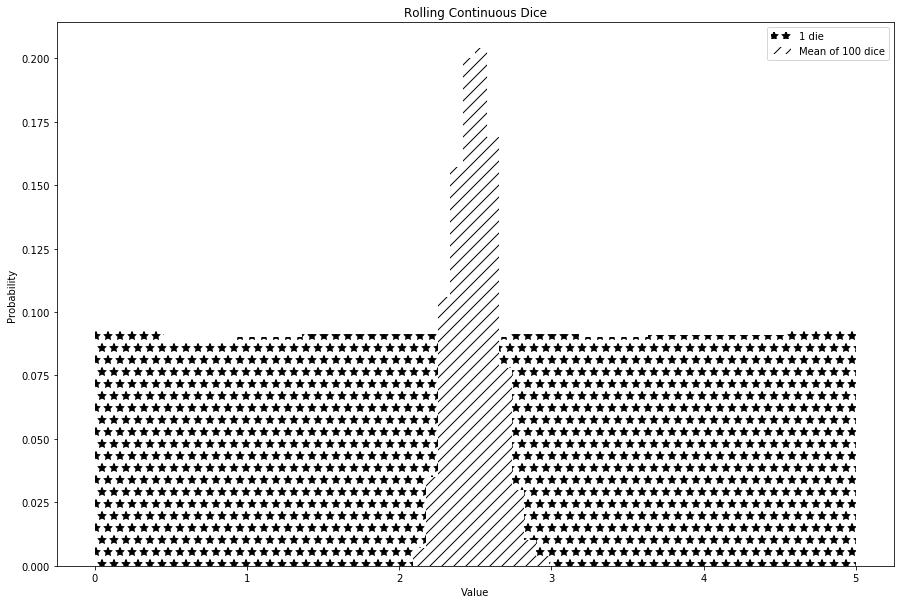

In [32]:
#Figure 17.8 has no code

#Figure 17.9
def plotMeans(numDicePerTrial, numDiceThrown, numBins, legend,
              color, style):
    means = []
    numTrials = numDiceThrown//numDicePerTrial
    for i in range(numTrials):
        vals = 0
        for j in range(numDicePerTrial):
            vals += 5*random.random()
        means.append(vals/numDicePerTrial)
    pylab.hist(means, numBins, color = color, label = legend,
               weights = pylab.array(len(means)*[1])/len(means),
               hatch = style)
    return sum(means)/len(means), variance(means)

mean, var = plotMeans(1, 100000, 11, '1 die', 'w', '*')
print('Mean of rolling 1 die =', round(mean,4),
      'Variance =', round(var,4))
mean, var = plotMeans(100, 100000, 11,
                      'Mean of 100 dice', 'w', '//')
print('Mean of rolling 100 dice =', round(mean, 4),
      'Variance =', round(var, 4))
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

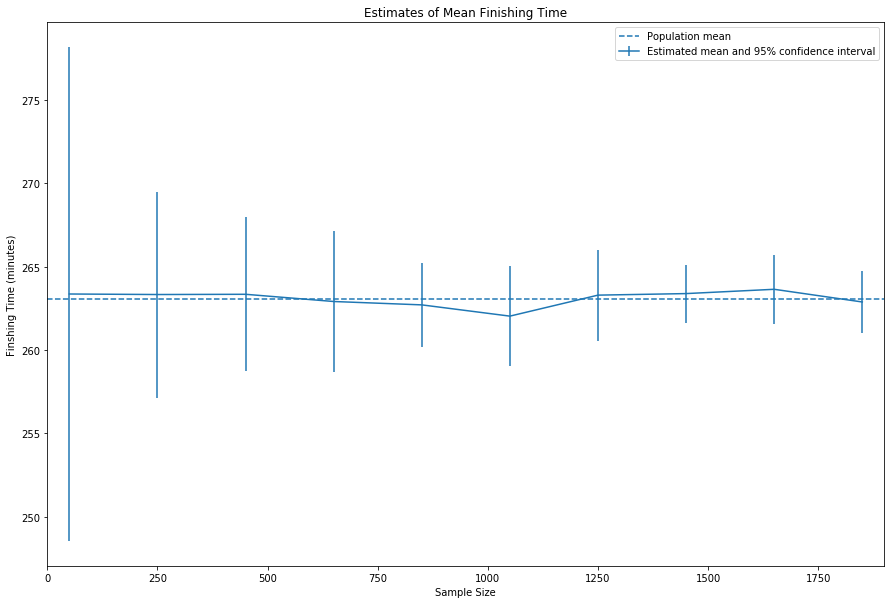

In [50]:
#Figure 17.10 has no code

#Figure 17.11
times = getBMData('bm_results2012.txt')['time']
meanOfMeans, stdOfMeans = [], []
sampleSizes = range(50, 2000, 200)
for sampleSize in sampleSizes:
    sampleMeans = []
    for t in range(20):
        sample = random.sample(times, sampleSize)
        sampleMeans.append(sum(sample)/sampleSize)
    meanOfMeans.append(sum(sampleMeans)/len(sampleMeans))
    stdOfMeans.append(stdDev(sampleMeans))
pylab.errorbar(sampleSizes, meanOfMeans,
               yerr = 1.96*pylab.array(stdOfMeans),
               label = 'Estimated mean and 95% confidence interval')
pylab.xlim(0, max(sampleSizes) + 50)
pylab.axhline(sum(times)/len(times), linestyle = '--',
              label = 'Population mean')
pylab.title('Estimates of Mean Finishing Time')
pylab.xlabel('Sample Size')
pylab.ylabel('Finshing Time (minutes)')
pylab.legend(loc = 'best')
pylab.show()